In [83]:
%matplotlib inline

In [84]:
# Create dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib as mpl

#load in csv
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [85]:
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [86]:
# Get the columns and rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [87]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [88]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [89]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [90]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")


18

In [91]:
# Get the number of data points from the Surburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [92]:
# Get all the null values for ride_data.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [93]:
#Check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [94]:
# Merge the two data frames into a single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the dataframe.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [95]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [96]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [97]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [98]:
# Get the number of rides for Urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [99]:
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [100]:
# Get the number of rides for Surburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [101]:
# Get the average fare of rides for Urban cities.
urban_ride_fares = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_ride_fares.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [102]:
# Get the average fare of rides for rural cities/
rural_ride_fares = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_ride_fares.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [103]:
# Get the average fare of rides for suburban cities.
suburban_ride_fares = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_ride_fares.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [104]:
# Get the average number of drivers for urban cities.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [105]:
# Get the average number of drivers for rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [106]:
# Get the average number of drivers for suburban cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

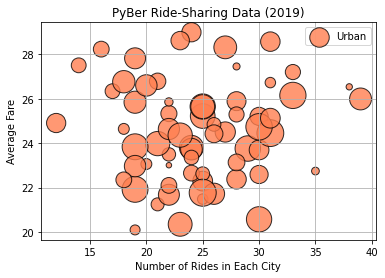

In [107]:
# Make a scatter plot for urban cities. The x-axis is the number of rides for each city. 
# The y-axis is the average fare for each city.
# The size of each marker is the average number of drivers in each city.

plt.scatter(urban_ride_count, urban_ride_fares, s= [i * 10 for i in urban_driver_count], alpha=.8, linewidths=1, color="coral", edgecolors="black", label="Urban")

plt.xlabel("Number of Rides in Each City")
plt.ylabel("Average Fare")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
#Add the legend
plt.legend()

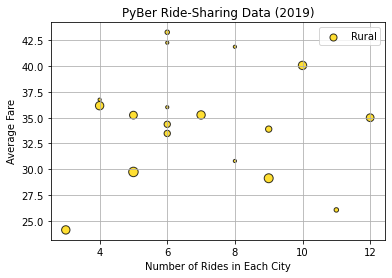

In [108]:
# Make a scatter plot for rural cities. The x-axis is the number of rides for each city. 
# The y-axis is the average fare for each city.
# The size of each marker is the average number of drivers in each city.

plt.scatter(rural_ride_count, rural_ride_fares, s= [i * 10 for i in rural_driver_count], alpha=.8, linewidths=1, color="gold", edgecolors="black", label="Rural")

plt.xlabel("Number of Rides in Each City")
plt.ylabel("Average Fare")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
#Add the legend
plt.legend()

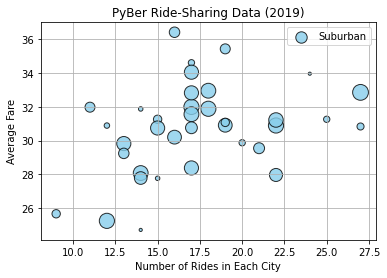

In [109]:
# Make a scatter plot for suburban cities. The x-axis is the number of rides for each city. 
# The y-axis is the average fare for each city.
# The size of each marker is the average number of drivers in each city.

plt.scatter(suburban_ride_count, suburban_ride_fares, s= [i * 10 for i in suburban_driver_count], alpha=.8, linewidths=1, color="skyblue", edgecolors="black", label="Suburban")

plt.xlabel("Number of Rides in Each City")
plt.ylabel("Average Fare")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
#Add the legend
plt.legend()

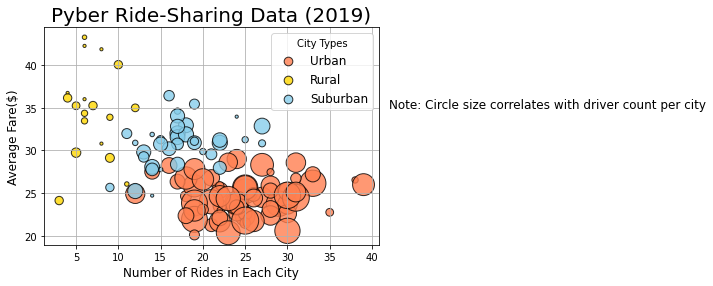

In [110]:
# Add the scatter charts to each type of city.

plt.scatter(urban_ride_count, urban_ride_fares, s= [i * 10 for i in urban_driver_count], alpha=.8, linewidths=1, color="coral", edgecolors="black", label="Urban")
plt.scatter(rural_ride_count, rural_ride_fares, s= [i * 10 for i in rural_driver_count], alpha=.8, linewidths=1, color="gold", edgecolors="black", label="Rural")
plt.scatter(suburban_ride_count, suburban_ride_fares, s= [i * 10 for i in suburban_driver_count], alpha=.8, linewidths=1, color="skyblue", edgecolors="black", label="Suburban")

# Incorporate the other graph properties.
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Number of Rides in Each City", fontsize=12)
plt.ylabel("Average Fare($)", fontsize=12)
plt.grid(True)
# Create a legend
lgnd = plt.legend( fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.text(42, 35, "Note: Circle size correlates with driver count per city", fontsize=12)
# Save the figure.
plt.savefig("Resources/Fig1.png")
plt.show()

In [111]:
# Get Summary Statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [112]:
# Get Summary Statistics.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [113]:
# Get Summary Statistics.
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [114]:
# Get Summary Statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [115]:
# Get Summary Statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [116]:
# Get Summary Statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [117]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2)

(24.62, 6.94, 17.36)

In [118]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(), 2), round(rural_ride_count.median(), 2), round(suburban_ride_count.median(), 2)

(24.0, 6.0, 17.0)

In [119]:
# Calculate the mode of the ride count for each city type.
urban_ride_count.mode(), rural_ride_count.mode(), suburban_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    6
 dtype: int64,
 0    17
 dtype: int64)

In [120]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [121]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [122]:
#Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [123]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [124]:
# Calculate the mean, median, mode for the fares in urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean for the fares in urban cities is {mean_urban_fares:.2f}.")

median_urban_fares =np.median(urban_fares)
print(f"The median for the fares in urban cities is {median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode for the fares in urban cities is {mode_urban_fares}.")

The mean for the fares in urban cities is 24.53.
The median for the fares in urban cities is 24.64.
The mode for the fares in urban cities is ModeResult(mode=array([22.86]), count=array([5])).


In [125]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [126]:
# Calculate the mean, median, mode for the fares in rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean for the fares in rural cities is {mean_rural_fares:.2f}.")

median_rural_fares =np.median(rural_fares)
print(f"The median for the fares in rural cities is {median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode for the fares in rural cities is {mode_rural_fares}.")

The mean for the fares in rural cities is 34.62.
The median for the fares in rural cities is 37.05.
The mode for the fares in rural cities is ModeResult(mode=array([37.05]), count=array([2])).


In [127]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [128]:
# Calculate the mean, median, mode for the fares in suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean for the fares in suburban cities is {mean_suburban_fares:.2f}.")

median_suburban_fares =np.median(suburban_fares)
print(f"The median for the fares in suburban cities is {median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode for the fares in suburban cities is {mode_suburban_fares}.")

The mean for the fares in suburban cities is 30.97.
The median for the fares in suburban cities is 30.75.
The mode for the fares in suburban cities is ModeResult(mode=array([17.99]), count=array([3])).


In [129]:
# Get the driver counts for each city type.
urban_drivers = urban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]
suburban_drivers= suburban_cities_df["driver_count"]


In [130]:
# Calculate the mean, median, mode for the driver counts in urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for the driver counts in urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers =np.median(urban_drivers)
print(f"The median for the driver counts in urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for the driver counts in urban cities is {mode_urban_drivers}.")

The mean for the driver counts in urban cities is 36.68.
The median for the driver counts in urban cities is 37.00.
The mode for the driver counts in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [131]:
# Calculate the mean, median, mode for the driver counts in rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean for the driver counts in rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers =np.median(rural_drivers)
print(f"The median for the driver counts in rural cities is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for the driver counts in rural cities is {mode_rural_drivers}.")

The mean for the driver counts in rural cities is 4.30.
The median for the driver counts in rural cities is 4.00.
The mode for the driver counts in rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [132]:
# Calculate the mean, median, mode for the driver counts in suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean for the driver counts in suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers =np.median(suburban_drivers)
print(f"The median for the driver counts in suburban cities is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for the driver counts in suburban cities is {mode_suburban_drivers}.")

The mean for the driver counts in suburban cities is 13.71.
The median for the driver counts in suburban cities is 16.00.
The mode for the driver counts in suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


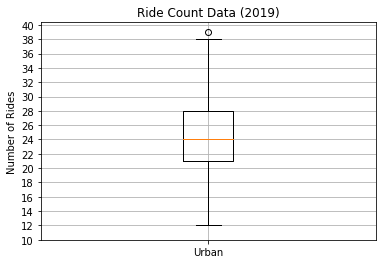

In [133]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

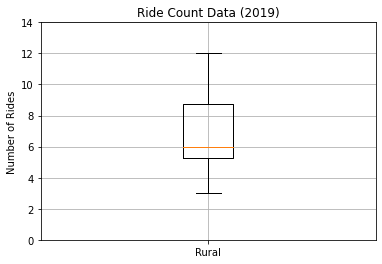

In [134]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,15, step=2.0))
ax.grid()
plt.show()

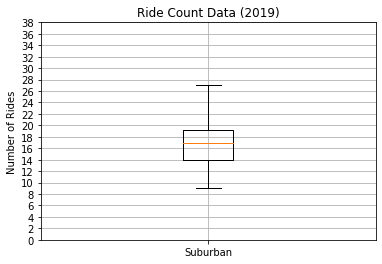

In [135]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,40, step=2.0))
ax.grid()
plt.show()

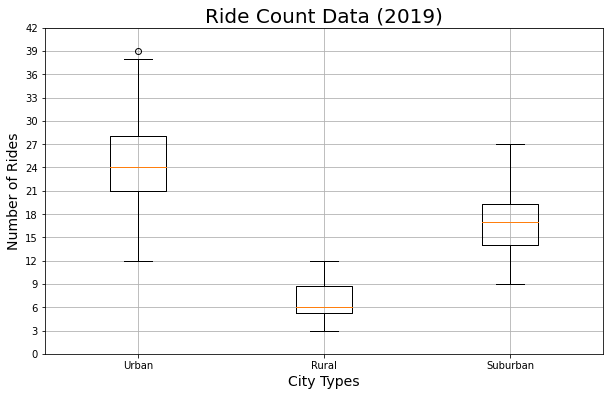

In [136]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Rural", "Suburban"]
ride_count_data = [urban_ride_count, rural_ride_count, suburban_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
#Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure
plt.savefig("Resources/Ride_Count_Data_2019_Box_Plot.png")
plt.show()

In [137]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count")

West Angela has the highest rider count


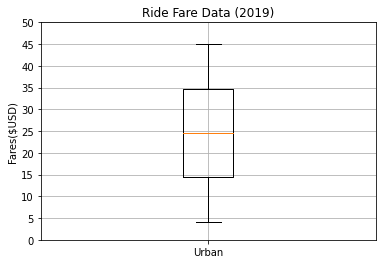

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [138]:
# Create a box-and-whisker plot for the urban ride fare count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

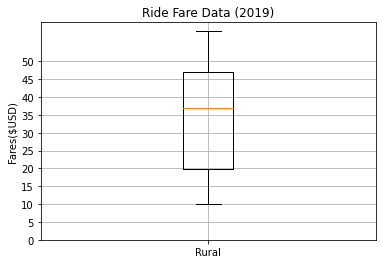

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [139]:
# Create a box-and-whisker plot for the rural ride fare count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

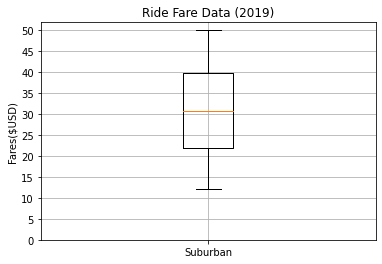

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [140]:
# Create a box-and-whisker plot for the urban ride fare count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

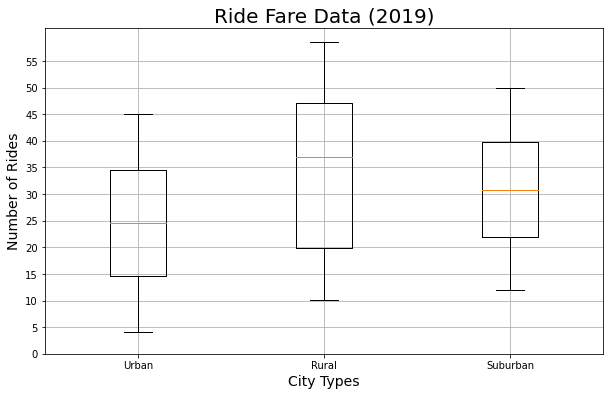

In [141]:
# Add all  ride fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Rural", "Suburban"]
ride_fare_data = [urban_fares, rural_fares, suburban_fares]
fig, ax = plt.subplots(figsize=(10,6))
#Add the title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure
plt.savefig("Resources/Ride_Fare_Data_2019_Box_Plot.png")
plt.show()

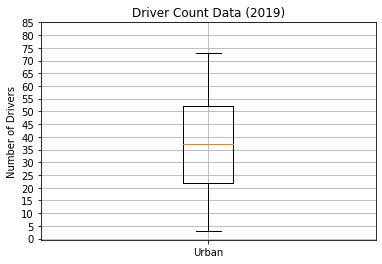

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [142]:
# Create a box-and-whisker plot for the urban driver count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

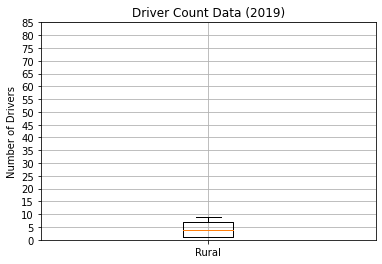

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [143]:
# Create a box-and-whisker plot for the rural driver count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

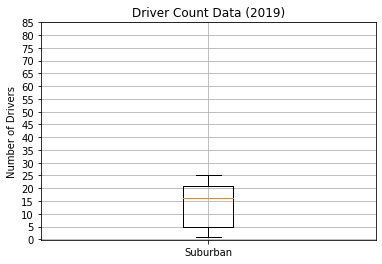

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [144]:
# Create a box-and-whisker plot for the rural driver count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

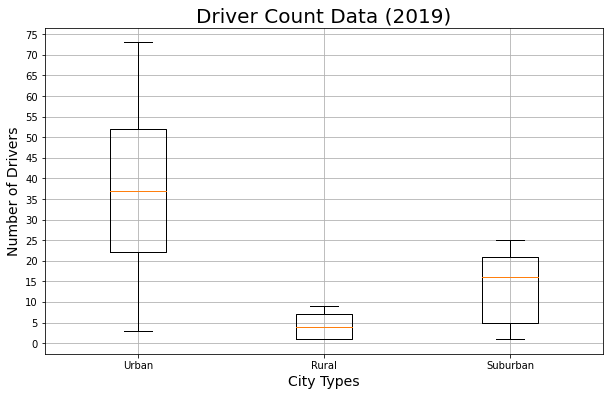

In [145]:
# Add all  ride fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Rural", "Suburban"]
driver_count_data = [urban_drivers, rural_drivers, suburban_drivers]
fig, ax = plt.subplots(figsize=(10,6))
#Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure
plt.savefig("Resources/Driver_Count_Data_2019_Box_Plot.png")
plt.show()

In [146]:
# Get the Sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [147]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [148]:
# Get the percentage of the fares of each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

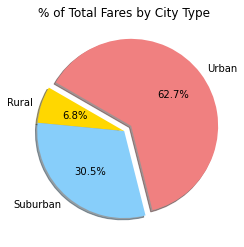

In [149]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#Change default font size from 10 to 14.
mpl.rcParams["font.size"] = 14
#Save Figure
plt.savefig("Resources/Total_Fares_By_City_Type_Pie.png")
plt.show()

In [150]:
# Get the Sum of the rides for each city type.
rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [151]:
total_rides_by_type = pyber_data_df["ride_id"].count()
total_rides_by_type

2375

In [152]:
# Get the percentage of the rides of each city type
ride_percents = 100 * rides_by_type / total_rides_by_type
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

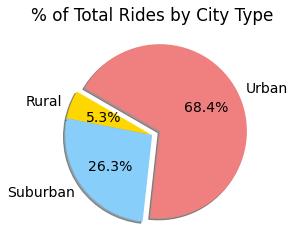

In [153]:
# Build the percentage of rides by city type pie chart.
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
#Change default font size from 10 to 14.
mpl.rcParams["font.size"] = 14
#Save Figure
plt.savefig("Resources/Rides_By_City_Type_Pie.png")
plt.show()

In [154]:
# Get the Sum of the drivers for each city type.
driver_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [155]:
# Get the total drivers from all city types.
total_drivers_by_type = city_data_df["driver_count"].sum()
total_drivers_by_type

2973

In [156]:
# Get the percentage of the drivers of each city type
driver_percents = 100 * driver_by_type / total_drivers_by_type
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

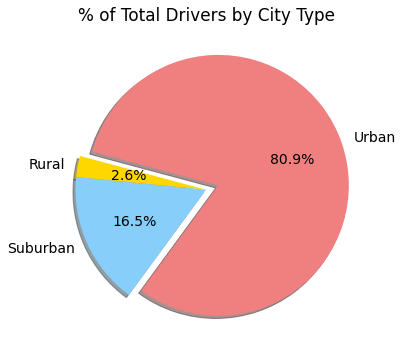

In [157]:
# Build the percentage of Drivers by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(driver_percents,
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,.1],
       autopct="%1.1f%%",
       shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
#Change default font size from 10 to 14.
mpl.rcParams["font.size"] = 14
#Save Figure
plt.savefig("Resources/Drivers_By_City_Type_Pie.png")
plt.show()
